<a href="https://colab.research.google.com/github/ledyquesada/Ejercicios/blob/main/Semana12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BOSQUES ALEATORIOS
**Clasificación con RandomForestClassifier**

In [1]:
# Importar bibliotecas necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Cargar conjunto de datos de Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el clasificador de Bosques Aleatorios
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')


Precisión del modelo: 1.0


**Regresión con RandomForestRegressor:**

In [3]:
# Importar bibliotecas necesarias
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Cargar conjunto de datos de diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el regresor de Bosques Aleatorios
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluar el rendimiento del modelo (Error Cuadrático Medio en este caso)
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')



Error Cuadrático Medio: 2952.0105887640448


**EVALUACIÓN DE BOSQUES**

In [ ]:
#CLASIFICACION

#1.	Exactitud (Accuracy):

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)

#Precisión, Recuperación y Puntuación F1

from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

#Matriz de Confusión

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)


#REGRESION

#Error cuadrático medio(MSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_pred)

#Coeficiente de Determinación (R²)

from sklearn.metrics import r2_score
r2 = r2_score(y_true, y_pred)




**Feature Importance**

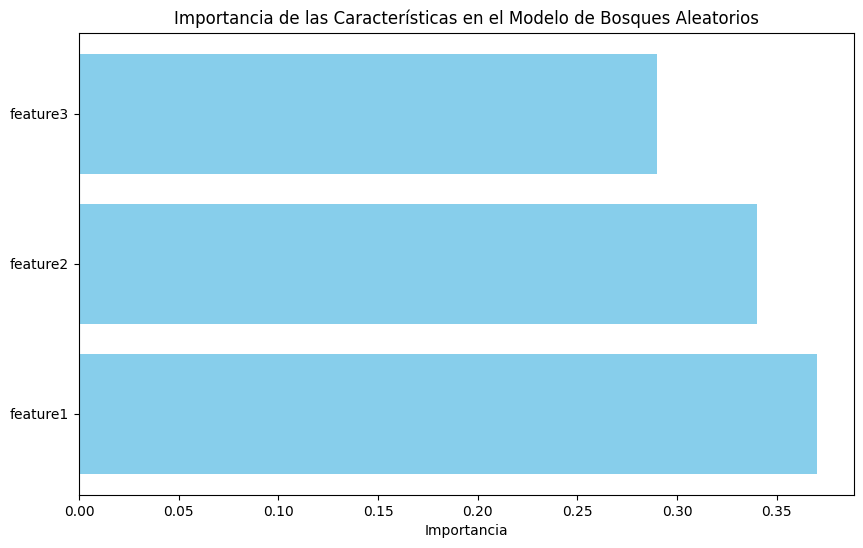

In [4]:
#importances = regressor.feature_importances_
#feature_names = df.columns[:-1]  # Ajusta esto según las columnas de tu conjunto de datos
#feature_importance_dict = dict(zip(feature_names, importances))

# Visualizar la importancia de las características
#sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
#for feature, importance in sorted_feature_importance:
#    print(f'{feature}: {importance}')


#Ejemplo
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Crear un conjunto de datos aleatorio
np.random.seed(42)
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'target': np.random.rand(100)
})

# Separar las características y la variable objetivo
X = data.drop('target', axis=1)
y = data['target']

# Crear y entrenar un modelo de Bosques Aleatorios
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X, y)

# Calcular la importancia de las características
importances = rf_regressor.feature_importances_
feature_names = X.columns

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características en el Modelo de Bosques Aleatorios')
plt.show()


**HIPERPARAMETROS**


In [ ]:
#GRID SEARCH

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el espacio de búsqueda
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Inicializar el modelo
rf_model = RandomForestClassifier()

# Realizar búsqueda grid
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros
best_params = grid_search.best_params_


#RANDOM SEARCH

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el espacio de búsqueda
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20)
}

# Inicializar el modelo
rf_model = RandomForestClassifier()

# Realizar búsqueda aleatoria
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv=5)
random_search.fit(X_train, y_train)

# Mejores hiperparámetros
best_params_random = random_search.best_params_



# REDES NEURONALES


In [9]:
#Construcción de Modelos Secuenciales

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Generar datos simulados
np.random.seed(42)
X = np.random.rand(100, 64)  # 100 muestras, 64 características
y = np.random.randint(2, size=100)  # Etiquetas binarias (0 o 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir la dimensión de las características de entrada
input_dim = X_train.shape[1]

# Crear un modelo secuencial
model = keras.Sequential()

# Agregar capas al modelo
model.add(layers.Dense(64, activation='relu', input_shape=(input_dim,)))
model.add(layers.Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


#Construccion de modelos funcionales

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

print("MODELOS FUNCIONALES")

# Generar datos simulados
np.random.seed(42)
X = np.random.rand(100, 64)  # 100 muestras, 64 características
y = np.random.randint(2, size=100)  # Etiquetas binarias (0 o 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir la dimensión de las características de entrada
input_dim = X_train.shape[1]

# Crear capa de entrada
input_layer = layers.Input(shape=(input_dim,))

# Agregar capas al modelo funcional
hidden_layer = layers.Dense(64, activation='relu')(input_layer)
output_layer = layers.Dense(1, activation='sigmoid')(hidden_layer)  # Capa de salida para clasificación binaria

# Crear modelo funcional
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/10
3/3 [==============================] - 1s 144ms/step - loss: 0.7269 - accuracy: 0.5375 - val_loss: 0.6754 - val_accuracy: 0.5500
Epoch 2/10
3/3 [==============================] - 0s 23ms/step - loss: 0.6726 - accuracy: 0.5875 - val_loss: 0.6853 - val_accuracy: 0.5500
Epoch 3/10
3/3 [==============================] - 0s 21ms/step - loss: 0.6307 - accuracy: 0.6250 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 32ms/step - loss: 0.5931 - accuracy: 0.7000 - val_loss: 0.7101 - val_accuracy: 0.4500
Epoch 5/10
3/3 [==============================] - 0s 33ms/step - loss: 0.5586 - accuracy: 0.7375 - val_loss: 0.7233 - val_accuracy: 0.4500
Epoch 6/10
3/3 [==============================] - 0s 32ms/step - loss: 0.5279 - accuracy: 0.7875 - val_loss: 0.7379 - val_accuracy: 0.4500
Epoch 7/10
3/3 [==============================] - 0s 30ms/step - loss: 0.4999 - accuracy: 0.8250 - val_loss: 0.7526 - val_accuracy: 0.4000
Epoch 8/10
3/3 [==========

**EJEMPLOS PRÁCTICOS**

In [10]:
#EJEMPLO CNN

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Cargar y preprocesar datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Construir el modelo CNN
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


#EJEMPLO red densa

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Generar datos de ejemplo para regresión
np.random.seed(42)
X = np.random.rand(1000, 10)
y = 3 * X[:, 0] + 2 * X[:, 3] + np.random.randn(1000)

# Construir el modelo de regresión
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(layers.Dense(1))  # Capa de salida sin función de activación para regresión

# Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
750/750 [==============================] - 40s 52ms/step - loss: 0.2128 - accuracy: 0.9357 - val_loss: 0.0928 - val_accuracy: 0.9718
Epoch 2/10
750/750 [==============================] - 42s 56ms/step - loss: 0.0556 - accuracy: 0.9826 - val_loss: 0.0468 - val_accuracy: 0.9862
Epoch 3/10
750/750 [==============================] - 36s 47ms/step - loss: 0.0395 - accuracy: 0.9880 - val_loss: 0.0477 - val_accuracy: 0.9852
Epoch 4/10
750/750 [==============================] - 36s 48ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0493 - val_accuracy: 0.9858
Epoch 5/10
750/750 [==============================] - 36s 49ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.0427 - val_accuracy: 0.9886
Epoch 6/10
750/750 [==============================] - 35s 47ms/step - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.0474 - val_accuracy: 0.9878
Epoch 7/10
750/750 [==============================] - 35s 47ms/step - l

**EVALUACION DE REDES NEURONALES**

In [ ]:
#CLASIFICACION


#MATRIZ DE CONFUSION

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_binary)
print(conf_matrix)


#RECALL Y ESPECIFIDAD
from sklearn.metrics import precision_score, recall_score, specificity_score

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
specificity = specificity_score(y_test, y_pred_binary)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Specificity: {specificity}')


#F1 SCORE

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_binary)
print(f'F1-Score: {f1}')


#AUC-ROC
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print(f'AUC-ROC Score: {roc_auc}')


#REGRESION
#MAE-MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')

#r^2

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')


#ANALISIS DE RESIDUOS
residuos = y_test - y_pred.flatten()

plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.show()


#PREDICCIONES VS VALORES REALES

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()



